In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from grid_search import generate_w
%load_ext autoreload
%autoreload 2

# 1 Least squares and linear basis functions models
## 1.1 Least squares

In [2]:
def calculate_mse(e):
    """Calculate the mse for vector e."""
    return 1/2*np.mean(e**2)


def calculate_mae(e):
    """Calculate the mae for vector e."""
    return np.mean(np.abs(e))


def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    e = y - tx.dot(w)
    return calculate_mse(e)


def generate_w(num_intervals):
    """Generate a grid of values for w0 and w1."""
    w0 = np.linspace(-100, 200, num_intervals)
    w1 = np.linspace(-150, 150, num_intervals)
    return w0, w1

def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    loss = np.zeros((len(w0), len(w1)))
    # compute loss for each combinationof w0 and w1.
    for ind_row, row in enumerate(w0):
        for ind_col, col in enumerate(w1):
            w = np.array([row, col])
            loss[ind_row, ind_col] = compute_loss(y, tx, w)
    return loss

def get_best_parameters(w0, w1, losses):
    """Get the best w from the result of grid search."""
    min_row, min_col = np.unravel_index(np.argmin(losses), losses.shape)
    return losses[min_row, min_col], w0[min_row], w1[min_col]


In [3]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least squares: TODO
    # returns mse, and optimal weights
    # ***************************************************
    w = np.linalg.solve(np.dot(tx.T,  tx), np.dot(tx.T,  y))
    return compute_loss(y, tx, w), w
    

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [4]:
from helpers import *
def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    grid_w0,  grid_w1 = generate_w(100)
    grid_losses = grid_search(y, tx, grid_w0, grid_w1)
    print(get_best_parameters(grid_w0, grid_w1,  grid_losses))

    # ***************************************************
    # INSERT YOUR CODE HERE
    # least square or grid search: TODO
    # this code should compare the optimal weights obtained 
    # by least squares vs. grid search
    # ***************************************************
    print(least_squares(y, tx))
    
    print 


Test it here

In [5]:
test_your_least_squares()

(15.55870336860953, 72.72727272727272, 13.636363636363626)
(15.3858878688294, array([73.293922  , 13.47971243]))


## 1.2 Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [6]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [7]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # polynomial basis function: TODO
    # this function should return the matrix formed
    # by applying the polynomial basis to the input data
    # ***************************************************
    xpoly = np.zeros((len(x), degree))
    for i in range(degree):
        xpoly[:, i] = x[:]**i
    return xpoly

Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

In [8]:
# from costs import compute_mse
from plots import plot_fitted_curve

def polynomial_regression(x, y):
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 27, len(x)]
    
    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        xpoly = build_poly(x, degree)
        rmse, weights = least_squares(y, xpoly)
        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        print (degree, len(weights), xpoly.shape)
        plot_fitted_curve(
            y, x, weights, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()

Run polynomial regression

Processing 1th experiment, degree=1, rmse=0.2505474601890666
1 1 (50, 1)
Processing 2th experiment, degree=3, rmse=0.10903607966427063
3 3 (50, 3)
Processing 3th experiment, degree=27, rmse=0.02688225462762966
27 27 (50, 27)
Processing 4th experiment, degree=50, rmse=0.025251104103624744
50 50 (50, 50)


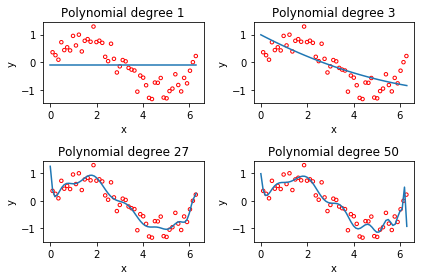

In [16]:
polynomial_regression(x, y)

# 2 Evaluating model predication performance


Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [15]:
def split_data(x, y, ratio, seed=1):
    """
    split the dataset based on the split ratio. If ratio is 0.8 
    you will have 80% of your data set dedicated to training 
    and the rest dedicated to testing
    """
    # set seed
    np.random.seed(seed)
    assert len(x)==len(y), 'not matching'
    a = np.arange(len(x))
    n_training = int(ratio*len(x))
    n_testing = len(x)-n_training
    msk = np.zeros(len(x), dtype=bool)
    choice_training = np.random.choice(a, size=n_training, replace=False)
    msk[choice_training] = True
    training_x = x[msk] 
    testing_x = x[~msk]
    
    training_y = y[msk]
    testing_y = y[~msk]
    
    return training_x, training_y, testing_x, testing_y


Then, test your `split_data` function below.

In [32]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    x_training, y_training, x_testing, y_testing = split_data(x, y, ratio, seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    x_poly_training = build_poly(x_training, degree)
    x_poly_testing = build_poly(x_testing, degree)

    # ***************************************************
    # INSERT YOUR CODE HERE
    # calcualte weight through least square.: TODO
    # ***************************************************
    rmse_tr, weights_training = least_squares(y_training, x_poly_training)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate RMSE for train and test data,
    # and store them in rmse_tr and rmse_te respectively: TODO
    # ***************************************************
    rmse_te = compute_loss(y_testing, x_poly_testing, weights_training)
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))
train_test_split_demo(x, y, 3, 0.8, 1)

proportion=0.8, degree=3, Training RMSE=0.091, Testing RMSE=0.245


In [34]:
seed = 6
degrees = range(3,11,2 )
split_ratios = [0.9, 0.5, 0.1]
for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

proportion=0.9, degree=3, Training RMSE=0.119, Testing RMSE=0.022
proportion=0.9, degree=5, Training RMSE=0.034, Testing RMSE=0.023
proportion=0.9, degree=7, Training RMSE=0.032, Testing RMSE=0.023
proportion=0.9, degree=9, Training RMSE=0.032, Testing RMSE=0.024
proportion=0.5, degree=3, Training RMSE=0.102, Testing RMSE=0.159
proportion=0.5, degree=5, Training RMSE=0.028, Testing RMSE=0.042
proportion=0.5, degree=7, Training RMSE=0.027, Testing RMSE=0.040
proportion=0.5, degree=9, Training RMSE=0.026, Testing RMSE=0.054
proportion=0.1, degree=3, Training RMSE=0.039, Testing RMSE=0.236
proportion=0.1, degree=5, Training RMSE=0.000, Testing RMSE=11.087
proportion=0.1, degree=7, Training RMSE=0.000, Testing RMSE=5.232
proportion=0.1, degree=9, Training RMSE=0.000, Testing RMSE=3.477


# 3 Ridge Regression
Please fill in the function below.

In [78]:
def ridge_regression(y, tx, lambda_):
    """implement ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
    N, D = tx.shape
    w = np.linalg.solve(np.dot(tx.T,  tx)+lambda_/ (2*N) *np.eye(D), np.dot(tx.T,  y))
    return compute_loss(y, tx, w), w


In [103]:
from plots import plot_train_test
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 3, 50)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    x_training, y_training, x_testing, y_testing = split_data(x, y, ratio, seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    x_poly_training = build_poly(x_training, degree)
    x_poly_testing = build_poly(x_testing, degree)

    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # ridge regression with a given lambda
        # ***************************************************
        rmse_training, weights_training = ridge_regression(y_training, x_poly_training, lambda_)
        rmse_tr.append(rmse_training)
    # ***************************************************
        rmse_te.append(compute_loss(y_testing, x_poly_testing, weights_training))
        
        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
        
    # Plot the obtained results
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)



proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.032, Testing RMSE=0.032
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.032, Testing RMSE=0.032
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.032, Testing RMSE=0.032
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.032, Testing RMSE=0.032
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.032, Testing RMSE=0.032
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.032, Testing RMSE=0.032
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.032, Testing RMSE=0.032
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.032, Testing RMSE=0.032
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.032, Testing RMSE=0.032
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.032, Testing RMSE=0.032
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.032, Testing RMSE=0.032
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.032, Testing RMSE=0.032
proportion=0.5, degree=7, lambda=0.001, 

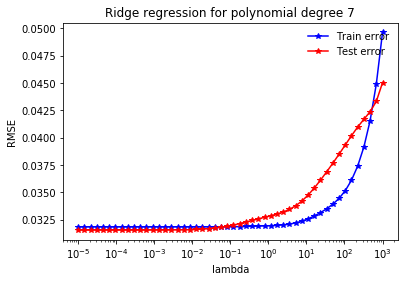

In [105]:
seed = 30
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)